# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **IBRD Credit Scorecard Predictive Engine** |

# II. Notebook Target Definition

This notebook describes the feature engineering phase of IBRD Credit Scorecard Predictive Engine Project. Here, we take the cleaned and preprocessed loan data and create new features that can enhance our model's predictive power. By applying techniques such as binning, polynomial feature creation, and interaction term generation, we unlock further insights and potentially improve our model's performance. This step readies our data for the next phase of model building and validation.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X_train = pd.read_pickle('../../data/processed/X_train.pkl')
X_test = pd.read_pickle('../../data/processed/X_test.pkl')
y_train = pd.read_pickle('../../data/processed/y_train.pkl')
y_test = pd.read_pickle('../../data/processed/y_test.pkl')

In [3]:
X_train.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
8919,2023-05-31,IBRDB0230,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,BLNR,Fully Repaid,NaN,P004903,NAT. WATER SUPPLY II,20000000.00,1996-07-01,1998-01-01,1988-01-29,1988-01-28,1988-07-05,1989-01-29,NaT
289,2023-05-31,IBRD02810,EAST ASIA AND PACIFIC,JP,Japan,JAPANESE NATIONAL RAILWAYS,NaN,NaN,NPL,Fully Repaid,5.75,P037442,NEW TOKAIDO LINE,80000000.00,1964-11-15,1981-05-15,1961-05-02,1961-05-01,1961-06-30,1964-09-30,NaT
2266,2023-05-31,IBRD1983S,LATIN AMERICA AND CARIBBEAN,NI,Nicaragua,INST. NICARAGUENSE DE ACUEDUCT,NI,Nicaragua,SCPD,Fully Repaid,9.60,P007764,WATER ENGINEERING,513117.72,1998-08-01,2001-08-01,1981-06-03,1981-04-30,1981-08-31,1984-12-31,NaT
838,2023-05-31,IBRD07920,LATIN AMERICA AND CARIBBEAN,GT,Guatemala,EMPRESA GUATEMALTECA DE TELECO,GT,Guatemala,NPL,Fully Repaid,7.25,P007184,COMMUNICATIONS,16000000.00,1977-01-15,1991-07-15,1972-01-05,1971-12-21,1972-07-17,1978-09-30,NaT
94,2023-05-31,IBRD00900,EAST ASIA AND PACIFIC,JP,Japan,NaN,NaN,NaN,NPL,Fully Repaid,5.00,P037422,KYUSHU POWER,11200000.00,1957-01-01,1973-07-01,1953-10-15,1953-10-15,1953-12-29,1957-08-31,NaT


In [4]:
X_test.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
219,2023-05-31,IBRD02130,EUROPE AND CENTRAL ASIA,AT,Austria,OESTERREICHISCHE ELEKTRIZITAET,NaN,NaN,NPL,Fully Repaid,5.75,P037355,ASCHACH POWER,25000000.00,1964-03-15,1983-09-15,1958-12-02,1958-12-01,1958-12-09,1963-12-31,NaT
3628,2023-05-31,IBRD2962S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,3.43,P005718,SAL I,93750000.00,1998-09-15,2005-09-15,1988-09-26,1988-06-16,1989-03-31,1991-06-30,NaT
497,2023-05-31,IBRD04791,LATIN AMERICA AND CARIBBEAN,CL,Chile,CORP. DE FOMENTO DE PRODUCCION (CORFO),CL,Chile,NPL,Fully Repaid,6.00,P006590,POWER V,60000000.00,1974-01-01,1997-01-01,1966-12-23,1966-12-22,1967-02-17,1974-03-31,NaT
5583,2023-05-31,IBRD4042S,EAST ASIA AND PACIFIC,ID,Indonesia,Ministry of Finance,ID,Indonesia,SCPD,Fully Repaid,4.98,P037097,ID-EAST JAVA & NTT JR. SECONDARY EDUC.,2497474.45,2002-02-15,2016-08-15,1996-08-12,1996-06-18,1996-10-16,2004-06-30,NaT
1556,2023-05-31,IBRD14260,LATIN AMERICA AND CARIBBEAN,GT,Guatemala,INSTITUTO NACIONAL DE ELECTRIF,GT,Guatemala,NPL,Fully Repaid,8.20,P007188,POWER III (AGUACAPA),55000000.00,1981-06-15,1994-06-15,1977-06-10,1977-05-17,1978-02-07,1981-06-30,NaT


In [5]:
y_train.head()

8919    0
289     0
2266    0
838     0
94      0
Name: bad, dtype: int32

In [6]:
y_test.head()

219     0
3628    0
497     0
5583    0
1556    0
Name: bad, dtype: int32

# IV. Feature Engineering

## IV.A. Data Shape Inspection

In [7]:
X_train.shape, X_test.shape

((4704, 21), (2017, 21))

In [8]:
y_train.shape, y_test.shape

((4704,), (2017,))

## IV.B. Data Information Inspection

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4704 entries, 8919 to 6608
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 4704 non-null   datetime64[ns]
 1   Loan Number                   4704 non-null   object        
 2   Region                        4704 non-null   object        
 3   Country Code                  4702 non-null   object        
 4   Country                       4704 non-null   object        
 5   Borrower                      4665 non-null   object        
 6   Guarantor Country Code        4513 non-null   object        
 7   Guarantor                     4515 non-null   object        
 8   Loan Type                     4704 non-null   object        
 9   Loan Status                   4704 non-null   object        
 10  Interest Rate                 4659 non-null   float64       
 11  Project ID                    47

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 219 to 1162
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 2017 non-null   datetime64[ns]
 1   Loan Number                   2017 non-null   object        
 2   Region                        2017 non-null   object        
 3   Country Code                  2017 non-null   object        
 4   Country                       2017 non-null   object        
 5   Borrower                      1999 non-null   object        
 6   Guarantor Country Code        1929 non-null   object        
 7   Guarantor                     1929 non-null   object        
 8   Loan Type                     2017 non-null   object        
 9   Loan Status                   2017 non-null   object        
 10  Interest Rate                 1995 non-null   float64       
 11  Project ID                    201

In [11]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4704 entries, 8919 to 6608
Series name: bad
Non-Null Count  Dtype
--------------  -----
4704 non-null   int32
dtypes: int32(1)
memory usage: 55.1 KB


In [12]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2017 entries, 219 to 1162
Series name: bad
Non-Null Count  Dtype
--------------  -----
2017 non-null   int32
dtypes: int32(1)
memory usage: 23.6 KB


## IV.C. Unused Feature Removal

In [13]:
def unused_feat_removal(df, feature_to_remove):
    df.drop(columns = feature_to_remove, inplace = True)
    return df

In [14]:
feature_to_remove = ["End of Period", "Loan Number", "Country Code", "Borrower", "Guarantor Country Code", "Loan Status", "Interest Rate", "Project ID", "Project Name", "First Repayment Date", "Last Repayment Date", "Agreement Signing Date",
                     "Board Approval Date", "Effective Date (Most Recent)", "Closed Date (Most Recent)", "Last Disbursement Date"]

In [15]:
unused_feat_removal(X_train, feature_to_remove)
unused_feat_removal(X_test, feature_to_remove)
X_train.shape, X_test.shape

((4704, 5), (2017, 5))

In [16]:
X_train.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00
289,EAST ASIA AND PACIFIC,Japan,NaN,NPL,80000000.00
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00
94,EAST ASIA AND PACIFIC,Japan,NaN,NPL,11200000.00


In [17]:
X_test.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
219,EUROPE AND CENTRAL ASIA,Austria,NaN,NPL,25000000.00
3628,MIDDLE EAST AND NORTH AFRICA,Tunisia,Tunisia,SCPM,93750000.00
497,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,60000000.00
5583,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCPD,2497474.45
1556,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,55000000.00


## IV.D. Feature Renaming

In [18]:
def feature_rename(df, rename_dict):
    return df.rename(columns = rename_dict)

In [19]:
rename_dict = {"Region": "region",
               "Country": "country",
               "Guarantor": "guarantor",
               "Loan Type": "loan_type",
               "Original Principal Amount": "principal_amount"}

In [20]:
X_train = feature_rename(X_train, rename_dict)
X_test = feature_rename(X_test, rename_dict)
X_train.shape, X_test.shape

((4704, 5), (2017, 5))

In [21]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00
289,EAST ASIA AND PACIFIC,Japan,NaN,NPL,80000000.00
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00
94,EAST ASIA AND PACIFIC,Japan,NaN,NPL,11200000.00


In [22]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
219,EUROPE AND CENTRAL ASIA,Austria,NaN,NPL,25000000.00
3628,MIDDLE EAST AND NORTH AFRICA,Tunisia,Tunisia,SCPM,93750000.00
497,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,60000000.00
5583,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCPD,2497474.45
1556,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,55000000.00


## IV.E. Country - Guarantor Status

In [23]:
def country_guarantor_status_generator(df):
    df["country_guarantor_status"] = df.apply(lambda row: "same" if row["country"] == row["guarantor"] else ("no_guarantor" if pd.isnull(row["guarantor"]) else "differ"), axis = 1)
    return df

In [24]:
X_train = country_guarantor_status_generator(X_train)
X_test = country_guarantor_status_generator(X_test)
X_train.shape, X_test.shape

((4704, 6), (2017, 6))

In [25]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00,same
289,EAST ASIA AND PACIFIC,Japan,NaN,NPL,80000000.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72,same
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00,same
94,EAST ASIA AND PACIFIC,Japan,NaN,NPL,11200000.00,no_guarantor


In [26]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
219,EUROPE AND CENTRAL ASIA,Austria,NaN,NPL,25000000.00,no_guarantor
3628,MIDDLE EAST AND NORTH AFRICA,Tunisia,Tunisia,SCPM,93750000.00,same
497,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,60000000.00,same
5583,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCPD,2497474.45,same
1556,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,55000000.00,same


## IV.F. Final Feature Inspection

In [27]:
X_train.shape, X_test.shape

((4704, 6), (2017, 6))

In [28]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00,same
289,EAST ASIA AND PACIFIC,Japan,NaN,NPL,80000000.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72,same
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00,same
94,EAST ASIA AND PACIFIC,Japan,NaN,NPL,11200000.00,no_guarantor


In [29]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
219,EUROPE AND CENTRAL ASIA,Austria,NaN,NPL,25000000.00,no_guarantor
3628,MIDDLE EAST AND NORTH AFRICA,Tunisia,Tunisia,SCPM,93750000.00,same
497,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,60000000.00,same
5583,EAST ASIA AND PACIFIC,Indonesia,Indonesia,SCPD,2497474.45,same
1556,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,55000000.00,same


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4704 entries, 8919 to 6608
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    4704 non-null   object 
 1   country                   4704 non-null   object 
 2   guarantor                 4515 non-null   object 
 3   loan_type                 4704 non-null   object 
 4   principal_amount          4704 non-null   float64
 5   country_guarantor_status  4704 non-null   object 
dtypes: float64(1), object(5)
memory usage: 257.2+ KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 219 to 1162
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    2017 non-null   object 
 1   country                   2017 non-null   object 
 2   guarantor                 1929 non-null   object 
 3   loan_type                 2017 non-null   object 
 4   principal_amount          2017 non-null   float64
 5   country_guarantor_status  2017 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


# V. Feature Selection

## V.A. Feature Binning

### V.A.1. Feature Weight of Evidence and Information Value Inspection

In [32]:
def woe_analysis(X, feature, y):
    df = pd.concat([X[feature], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns[0], "n_observation", "proportion_of_category"]
    df["proportion_of_observation"] = df["n_observation"] / df["n_observation"].sum()
    df["n_good"] = df["proportion_of_category"] * df["n_observation"]
    df["n_bad"] = (1 - df["proportion_of_category"]) * df["n_observation"]
    df["proportion_of_good"] = df["n_good"] / df["n_good"].sum()
    df["proportion_of_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["proportion_of_good"] / df["proportion_of_bad"])
    df = df.sort_values(["WoE"]).reset_index(drop = True)
    df["diff_proportion_of_category"] = df["proportion_of_category"].diff().abs()
    df["diff_WoE"] = df["WoE"].diff().abs()
    df["IV"] = (df["proportion_of_good"] - df["proportion_of_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

def plot_by_woe(woe_df, rotation_of_x_axis_labels = 0):
    x = np.array(woe_df.iloc[:, 0].astype(str))
    y = woe_df["WoE"]
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(woe_df.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title("Weight of Evidence by " + woe_df.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [33]:
X_binning = X_train.copy()
X_binning.shape

(4704, 6)

In [34]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00,same
289,EAST ASIA AND PACIFIC,Japan,NaN,NPL,80000000.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72,same
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00,same
94,EAST ASIA AND PACIFIC,Japan,NaN,NPL,11200000.00,no_guarantor


#### V.A.1.A. Region

In [35]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,250,0.008000,0.053146,2.0,248.0,0.010309,0.054989,-1.674087,NaN,NaN,0.211339
1,EASTERN AND SOUTHERN AFRICA,212,0.023585,0.045068,5.0,207.0,0.025773,0.045898,-0.577087,0.015585,1.097001,0.211339
2,EAST ASIA AND PACIFIC,1016,0.023622,0.215986,24.0,992.0,0.123711,0.219956,-0.575475,0.000037,0.001612,0.211339
3,LATIN AMERICA AND CARIBBEAN,1555,0.045016,0.330570,70.0,1485.0,0.360825,0.329268,0.091519,0.021394,0.666994,0.211339
4,MIDDLE EAST AND NORTH AFRICA,555,0.048649,0.117985,27.0,528.0,0.139175,0.117073,0.172935,0.003633,0.081415,0.211339
5,EUROPE AND CENTRAL ASIA,887,0.050733,0.188563,45.0,842.0,0.231959,0.186696,0.217077,0.002084,0.044142,0.211339
6,SOUTH ASIA,229,0.091703,0.048682,21.0,208.0,0.108247,0.046120,0.853179,0.040970,0.636102,0.211339


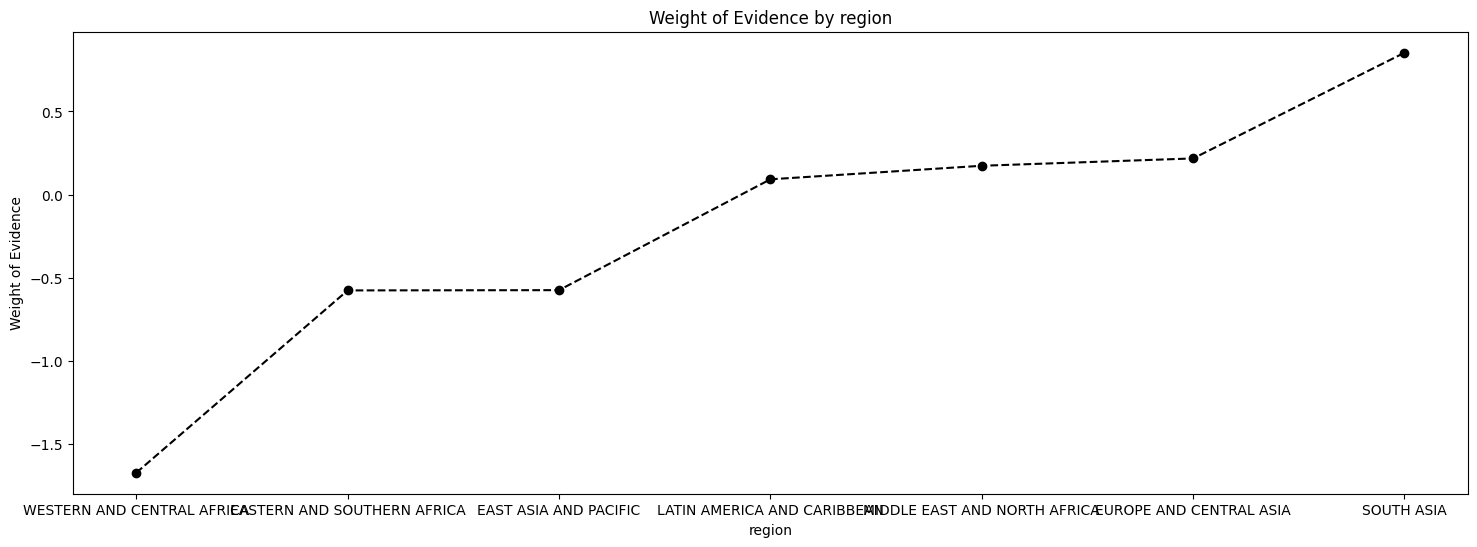

In [36]:
plot_by_woe(region_woe)

In [37]:
regions_bin = {"EAST ASIA AND PACIFIC": "EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC",
               "EASTERN AND SOUTHERN AFRICA": "EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC",
               "EUROPE AND CENTRAL ASIA": "EUROPE AND CENTRAL ASIA & SOUTH ASIA",
               "SOUTH ASIA": "EUROPE AND CENTRAL ASIA & SOUTH ASIA"}

In [38]:
def region_binning(df):
    df["region"] = df["region"].replace(regions_bin)
    return df

In [39]:
X_binning = region_binning(X_binning)
X_binning.shape

(4704, 6)

In [40]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,BLNR,20000000.00,same
289,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,Japan,NaN,NPL,80000000.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,Nicaragua,Nicaragua,SCPD,513117.72,same
838,LATIN AMERICA AND CARIBBEAN,Guatemala,Guatemala,NPL,16000000.00,same
94,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,Japan,NaN,NPL,11200000.00,no_guarantor


In [41]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,250,0.008000,0.053146,2.0,248.0,0.010309,0.054989,-1.674087,NaN,NaN,0.189241
1,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,1228,0.023616,0.261054,29.0,1199.0,0.149485,0.265854,-0.575753,0.015616,1.098334,0.189241
2,LATIN AMERICA AND CARIBBEAN,1555,0.045016,0.330570,70.0,1485.0,0.360825,0.329268,0.091519,0.021400,0.667273,0.189241
3,MIDDLE EAST AND NORTH AFRICA,555,0.048649,0.117985,27.0,528.0,0.139175,0.117073,0.172935,0.003633,0.081415,0.189241
4,EUROPE AND CENTRAL ASIA & SOUTH ASIA,1116,0.059140,0.237245,66.0,1050.0,0.340206,0.232816,0.379304,0.010491,0.206369,0.189241


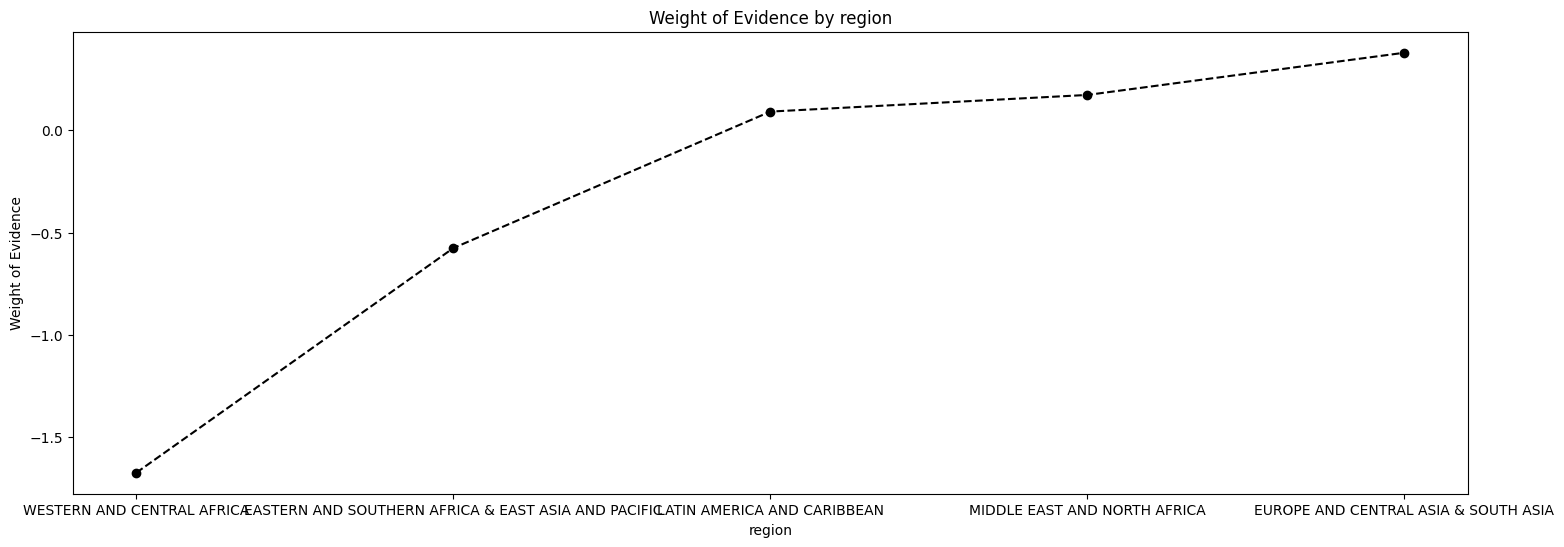

In [42]:
plot_by_woe(region_woe)

#### V.A.1.B. Country

In [43]:
country_woe = woe_analysis(X_binning, "country", y_train)
country_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Zimbabwe,2,0.000000,0.000425,0.0,2.0,0.000000,0.000443,-inf,NaN,NaN,inf
1,Papua New Guinea,25,0.000000,0.005315,0.0,25.0,0.000000,0.005543,-inf,0.000000,NaN,inf
2,Honduras,31,0.000000,0.006590,0.0,31.0,0.000000,0.006874,-inf,0.000000,NaN,inf
3,Haiti,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
4,Guyana,11,0.000000,0.002338,0.0,11.0,0.000000,0.002439,-inf,0.000000,NaN,inf
5,Romania,59,0.000000,0.012543,0.0,59.0,0.000000,0.013082,-inf,0.000000,NaN,inf
6,Senegal,14,0.000000,0.002976,0.0,14.0,0.000000,0.003104,-inf,0.000000,NaN,inf
7,Grenada,8,0.000000,0.001701,0.0,8.0,0.000000,0.001774,-inf,0.000000,NaN,inf
8,Greece,14,0.000000,0.002976,0.0,14.0,0.000000,0.003104,-inf,0.000000,NaN,inf
9,Ghana,7,0.000000,0.001488,0.0,7.0,0.000000,0.001552,-inf,0.000000,NaN,inf


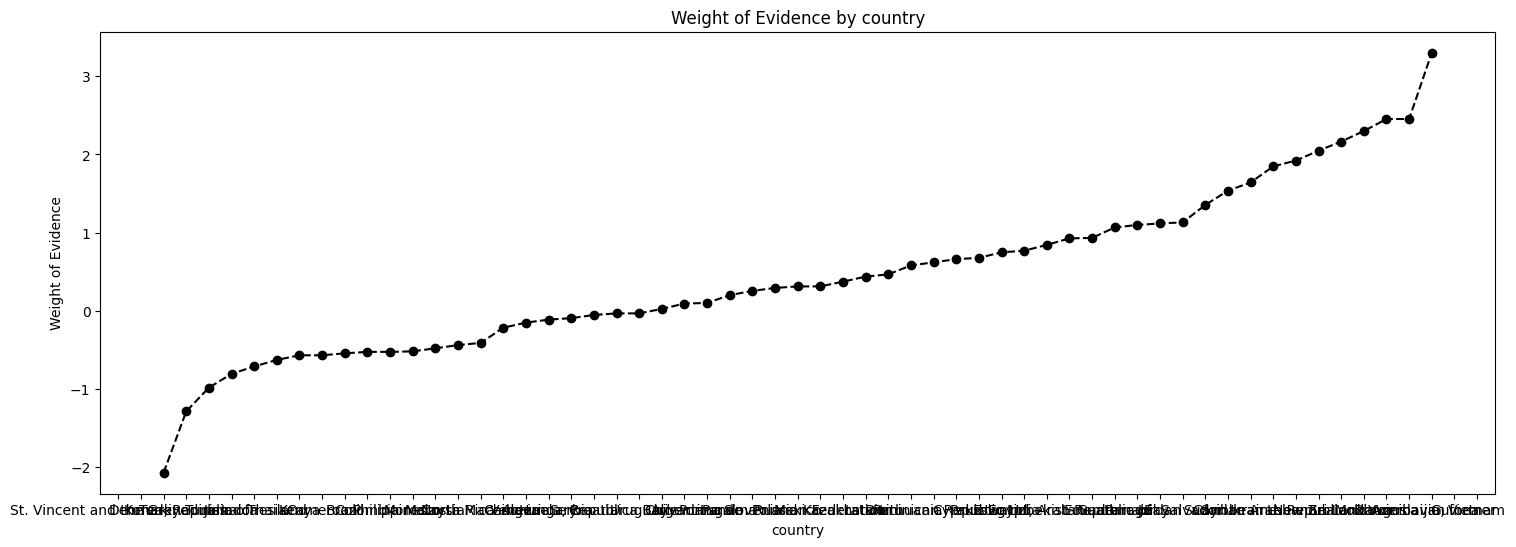

In [44]:
plot_by_woe(country_woe)

In [45]:
country_groups = [["Zimbabwe", "Papua New Guinea", "Honduras", "Haiti", "Guyana", "Romania", "Senegal", "Grenada", "Greece", "Ghana", "Gabon", "France", "Finland", "Fiji", "Ethiopia", "Seychelles", "Iceland", "Oman", "Iran, Islamic Republic of", "Iraq",
                   "Mauritania", "Myanmar", "Malawi", "Madagascar", "Namibia", "Liberia", "Lesotho", "Mauritius", "Netherlands", "Zambia", "Nigeria", "Norway", "Japan", "Italy", "Israel", "Ireland", "Nicaragua", "Sierra Leone", "Estonia", "Slovak Republic",
                   "Botswana", "Bosnia and Herzegovina", "Bolivia", "Belize", "Belgium", "Belarus", "Barbados", "Bangladesh", "Bahamas, The", "Austria", "Australia", "Armenia", "Turkmenistan", "Uganda", "Western and Central Africa", "Singapore", "Burundi",
                   "Bulgaria", "Montenegro", "Spain", "St. Kitts and Nevis", "Cote d'Ivoire", "Trinidad and Tobago", "St. Lucia", "Congo, Republic of", "Czechia", "Congo, Democratic Republic of", "Southern Africa", "Taiwan, China", "Tanzania", "Chad",
                   "South Africa", "Eastern and Southern Africa", "St. Vincent and the Grenadines", "Denmark", "Turkiye", "Korea, Republic of"],
                  ["Tunisia", "Jamaica", "Indonesia"],
                  ["Thailand", "Kenya", "Cameroon", "Brazil"],
                  ["Colombia", "Philippines"],
                  ["Morocco", "Malaysia", "Costa Rica", "North Macedonia"],
                  ["China", "Algeria", "Hungary"],
                  ["Serbia", "Croatia", "Venezuela, Republica Bolivariana de", "Uruguay", "Chile"],
                  ["Argentina", "Portugal", "Panama", "Slovenia", "Poland"],
                  ["Mexico", "Russian Federation", "Kazakhstan", "Latvia", "Peru", "Lithuania"],
                  ["Dominican Republic", "Cyprus", "Pakistan", "Eswatini", "India", "Uzbekistan", "Egypt, Arab Republic of", "Ecuador", "Guatemala"],
                  ["Paraguay", "Jordan", "El Salvador", "Sudan", "Caribbean", "Ukraine", "Syrian Arab Republic", "Lebanon", "New Zealand", "Sri Lanka", "Moldova", "Dominica", "Azerbaijan", "Yugoslavia, former", "Guinea", "Vietnam", "Mozambique", "Angola",
                   "Albania"]]

In [46]:
def country_binning(df, groups):
    for i, group in enumerate(groups):
        for country in group:
            df.loc[df["country"] == country, "country"] = f'group_{chr(97+i)}'
    remaining_countries = set(df["country"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    last_group_name = f'group_{chr(97+len(groups)-1)}'
    for country in remaining_countries:
        df.loc[df["country"] == country, "country"] = last_group_name
    return df

In [47]:
X_binning = country_binning(X_binning, country_groups)
X_binning.shape

(4704, 6)

In [48]:
country_woe = woe_analysis(X_binning, "country", y_train)
country_woe

,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,1135,0.001762,0.241284,2.0,1133.0,0.010309,0.251220,-3.193283,NaN,NaN,1.439339
1,group_b,517,0.019342,0.109906,10.0,507.0,0.051546,0.112417,-0.779732,0.017580,2.413551,1.439339
2,group_c,419,0.023866,0.089073,10.0,409.0,0.051546,0.090687,-0.564936,0.004524,0.214796,1.439339
3,group_d,322,0.024845,0.068452,8.0,314.0,0.041237,0.069623,-0.523757,0.000978,0.041179,1.439339
4,group_e,310,0.025806,0.065901,8.0,302.0,0.041237,0.066962,-0.484791,0.000962,0.038966,1.439339
5,group_f,317,0.034700,0.067389,11.0,306.0,0.056701,0.067849,-0.179496,0.008894,0.305296,1.439339
6,group_g,275,0.040000,0.058461,11.0,264.0,0.056701,0.058537,-0.031860,0.005300,0.147636,1.439339
7,group_h,269,0.048327,0.057185,13.0,256.0,0.067010,0.056763,0.165966,0.008327,0.197826,1.439339
8,group_i,444,0.058559,0.094388,26.0,418.0,0.134021,0.092683,0.368809,0.010231,0.202843,1.439339
9,group_j,451,0.088692,0.095876,40.0,411.0,0.206186,0.091131,0.816481,0.030133,0.447671,1.439339


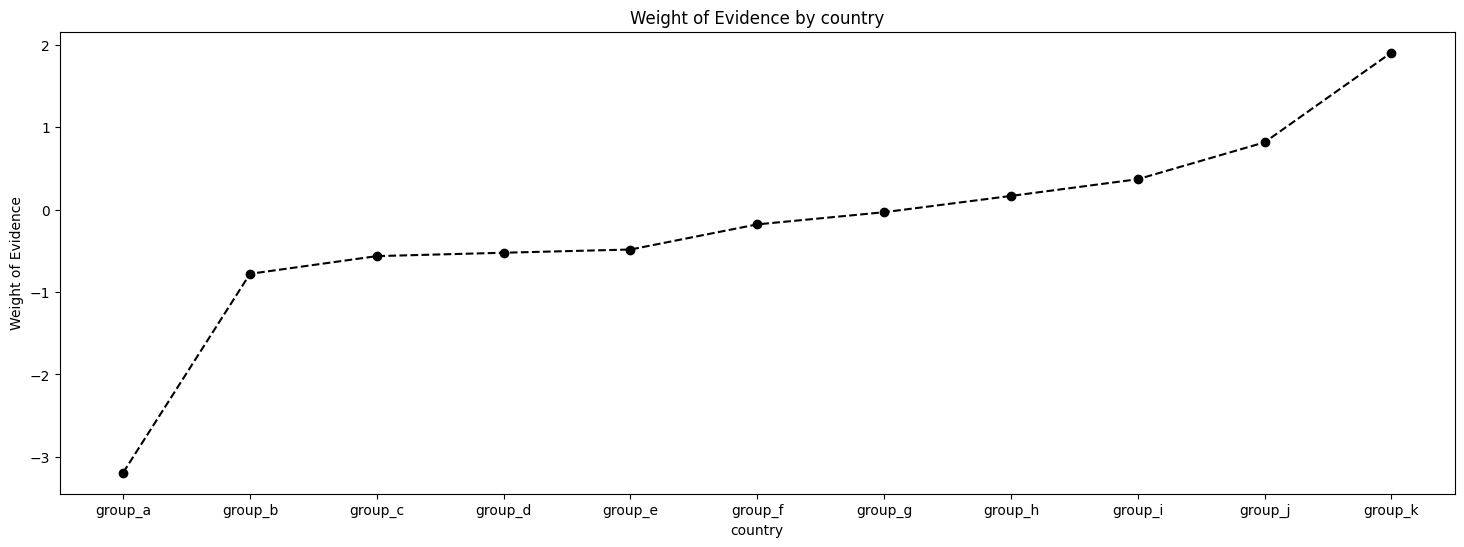

In [49]:
plot_by_woe(country_woe)

#### V.A.1.C. Guarantor

In [50]:
guarantor_woe = woe_analysis(X_binning, "guarantor", y_train)
guarantor_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,guarantor,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Zambia,17,0.000000,0.003765,0.0,17.0,0.000000,0.003920,-inf,NaN,NaN,inf
1,France,4,0.000000,0.000886,0.0,4.0,0.000000,0.000922,-inf,0.000000,NaN,inf
2,Gabon,19,0.000000,0.004208,0.0,19.0,0.000000,0.004381,-inf,0.000000,NaN,inf
3,Ghana,7,0.000000,0.001550,0.0,7.0,0.000000,0.001614,-inf,0.000000,NaN,inf
4,Grenada,8,0.000000,0.001772,0.0,8.0,0.000000,0.001845,-inf,0.000000,NaN,inf
5,Tanzania,18,0.000000,0.003987,0.0,18.0,0.000000,0.004150,-inf,0.000000,NaN,inf
6,Guyana,10,0.000000,0.002215,0.0,10.0,0.000000,0.002306,-inf,0.000000,NaN,inf
7,Haiti,1,0.000000,0.000221,0.0,1.0,0.000000,0.000231,-inf,0.000000,NaN,inf
8,Honduras,31,0.000000,0.006866,0.0,31.0,0.000000,0.007148,-inf,0.000000,NaN,inf
9,St. Vincent and the Grenadines,7,0.000000,0.001550,0.0,7.0,0.000000,0.001614,-inf,0.000000,NaN,inf


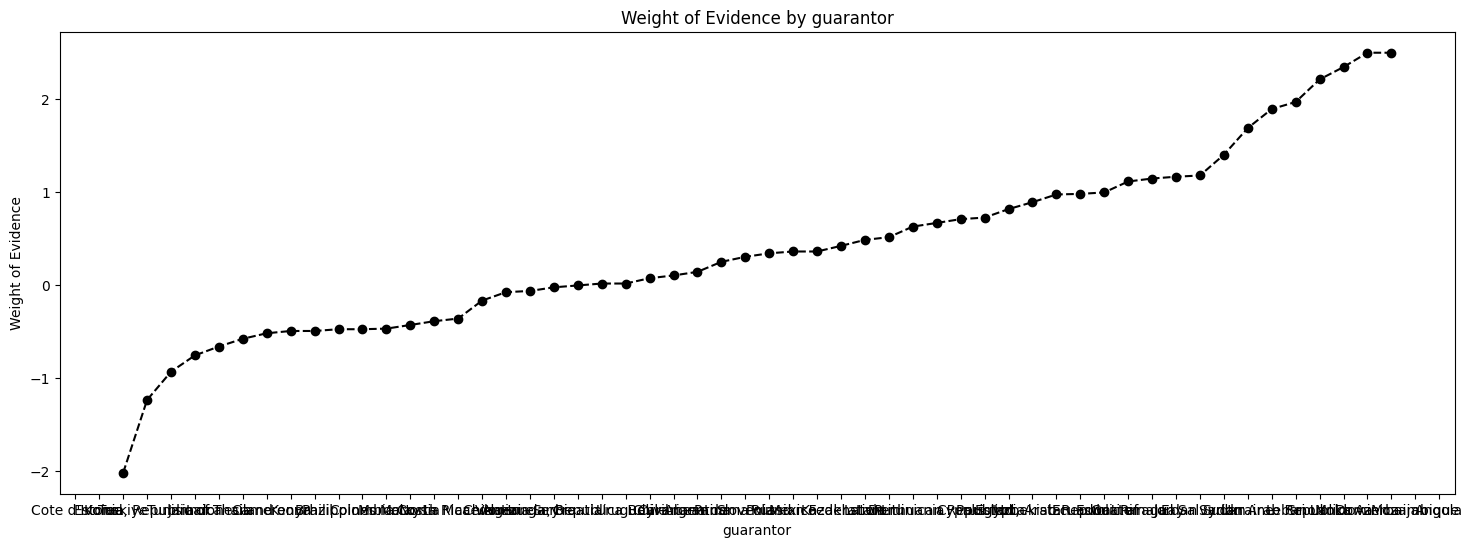

In [51]:
plot_by_woe(guarantor_woe)

In [52]:
guarantor_groups = [["Zambia", "France", "Gabon", "Ghana", "Grenada", "Tanzania", "Guyana", "Haiti", "Honduras", "St. Vincent and the Grenadines", "Iran, Islamic Republic of", "Iraq", "St. Lucia", "Western and Central Africa", "St. Kitts and Nevis", "Lesotho",
                     "Liberia", "South Africa", "Romania", "Seychelles", "Papua New Guinea", "Sierra Leone", "Nigeria", "Nicaragua", "Fiji", "Namibia", "Slovak Republic", "Montenegro", "Mauritius", "Mauritania", "Malawi", "Madagascar", "Myanmar", "Ethiopia",
                     "Taiwan, China", "Senegal", "Chad", "Botswana", "Bosnia and Herzegovina", "Bolivia", "Belize", "Belgium", "Congo, Democratic Republic of", "Congo, Republic of", "Bulgaria", "Bangladesh", "Belarus", "Australia", "Armenia", "United Kingdom",
                     "Czechia", "Uganda", "Turkmenistan", "Trinidad and Tobago", "Cote d'Ivoire", "Estonia", "Turkiye", "Korea, Republic of"],
                    ["Tunisia", "Jamaica", "Indonesia"],
                    ["Thailand", "Cameroon", "Kenya", "Brazil"],
                    ["Philippines", "Colombia"],
                    ["Morocco", "Malaysia", "Costa Rica", "North Macedonia"],
                    ["China", "Algeria", "Hungary", "Serbia"],
                    ["Croatia", "Venezuela, Republica Bolivariana de", "Uruguay", "Chile", "Caribbean", "Argentina"],
                    ["Panama", "Slovenia", "Poland", "Mexico", "Russian Federation", "Kazakhstan", "Latvia", "Peru", "Lithuania"],
                    ["Dominican Republic", "Cyprus", "Pakistan", "India", "Uzbekistan", "Egypt, Arab Republic of", "Ecuador", "Eswatini"],
                    ["Guatemala", "Paraguay", "Jordan", "El Salvador", "Sudan", "Ukraine", "Syrian Arab Republic", "Lebanon", "Sri Lanka", "Moldova", "Dominica", "Azerbaijan", "Mozambique", "Angola", "Vietnam", "Guinea", "Albania"]]

In [53]:
def guarantor_binning(df, groups):
    for i, group in enumerate(groups):
        for guarantor in group:
            df.loc[df["guarantor"] == guarantor, "guarantor"] = f'group_{chr(97+i)}'
    remaining_guarantors = set(df["guarantor"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    last_group_name = f'group_{chr(97+len(groups)-1)}'
    for guarantor in remaining_guarantors:
        df.loc[df["guarantor"] == guarantor, "guarantor"] = last_group_name
    df["guarantor"] = df["guarantor"].fillna(last_group_name)
    return df

In [54]:
X_binning = guarantor_binning(X_binning, guarantor_groups)
X_binning.shape

(4704, 6)

In [55]:
guarantor_woe = woe_analysis(X_binning, "guarantor", y_train)
guarantor_woe

,guarantor,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,987,0.002026,0.209821,2.0,985.0,0.010309,0.218404,-3.053300,NaN,NaN,1.118575
1,group_b,517,0.019342,0.109906,10.0,507.0,0.051546,0.112417,-0.779732,0.017316,2.273569,1.118575
2,group_c,418,0.023923,0.088861,10.0,408.0,0.051546,0.090466,-0.562488,0.004581,0.217244,1.118575
3,group_d,322,0.024845,0.068452,8.0,314.0,0.041237,0.069623,-0.523757,0.000921,0.038731,1.118575
4,group_e,310,0.025806,0.065901,8.0,302.0,0.041237,0.066962,-0.484791,0.000962,0.038966,1.118575
5,group_f,367,0.035422,0.078019,13.0,354.0,0.067010,0.078492,-0.158153,0.009616,0.326638,1.118575
6,group_g,378,0.042328,0.080357,16.0,362.0,0.082474,0.080266,0.027139,0.006906,0.185292,1.118575
7,group_h,558,0.057348,0.118622,32.0,526.0,0.164948,0.116630,0.346629,0.015020,0.319490,1.118575
8,group_i,413,0.087167,0.087798,36.0,377.0,0.185567,0.083592,0.797468,0.029819,0.450839,1.118575
9,group_j,434,0.135945,0.092262,59.0,375.0,0.304124,0.083149,1.296806,0.048778,0.499338,1.118575


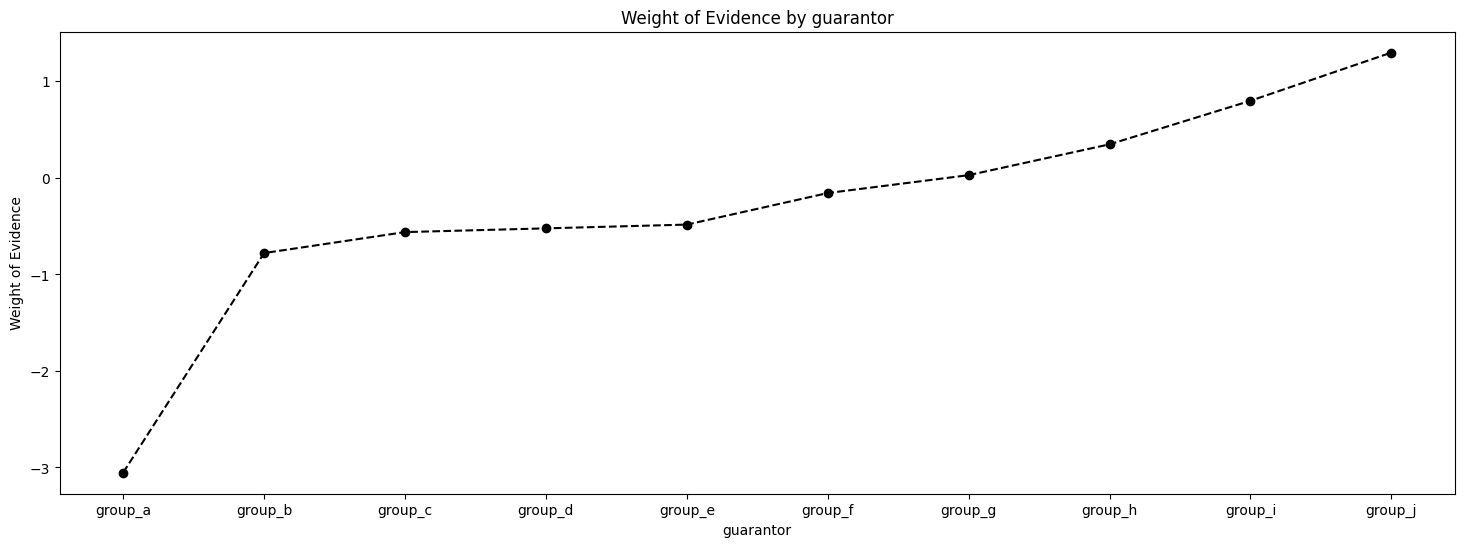

In [56]:
plot_by_woe(guarantor_woe)

#### V.A.1.D. Loan Type

In [57]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,BLNR,13,0.000000,0.002764,0.0,13.0,0.000000,0.002882,-inf,NaN,NaN,inf
1,SCPD,471,0.000000,0.100128,0.0,471.0,0.000000,0.104435,-inf,0.000000,NaN,inf
2,SCPM,114,0.000000,0.024235,0.0,114.0,0.000000,0.025277,-inf,0.000000,NaN,inf
3,SCPY,10,0.000000,0.002126,0.0,10.0,0.000000,0.002217,-inf,0.000000,NaN,inf
4,NPL,1412,0.022663,0.300170,32.0,1380.0,0.164948,0.305987,-0.617909,0.022663,inf,inf
5,SCL,789,0.031686,0.167730,25.0,764.0,0.128866,0.169401,-0.273498,0.009023,0.344411,inf
6,CPL,1501,0.037308,0.319090,56.0,1445.0,0.288660,0.320399,-0.104319,0.005623,0.169179,inf
7,FSL,362,0.135359,0.076956,49.0,313.0,0.252577,0.069401,1.291811,0.098051,1.396130,inf
8,BLNC,2,1.000000,0.000425,2.0,0.0,0.010309,0.000000,inf,0.864641,inf,inf
9,GUBF,1,1.000000,0.000213,1.0,0.0,0.005155,0.000000,inf,0.000000,NaN,inf


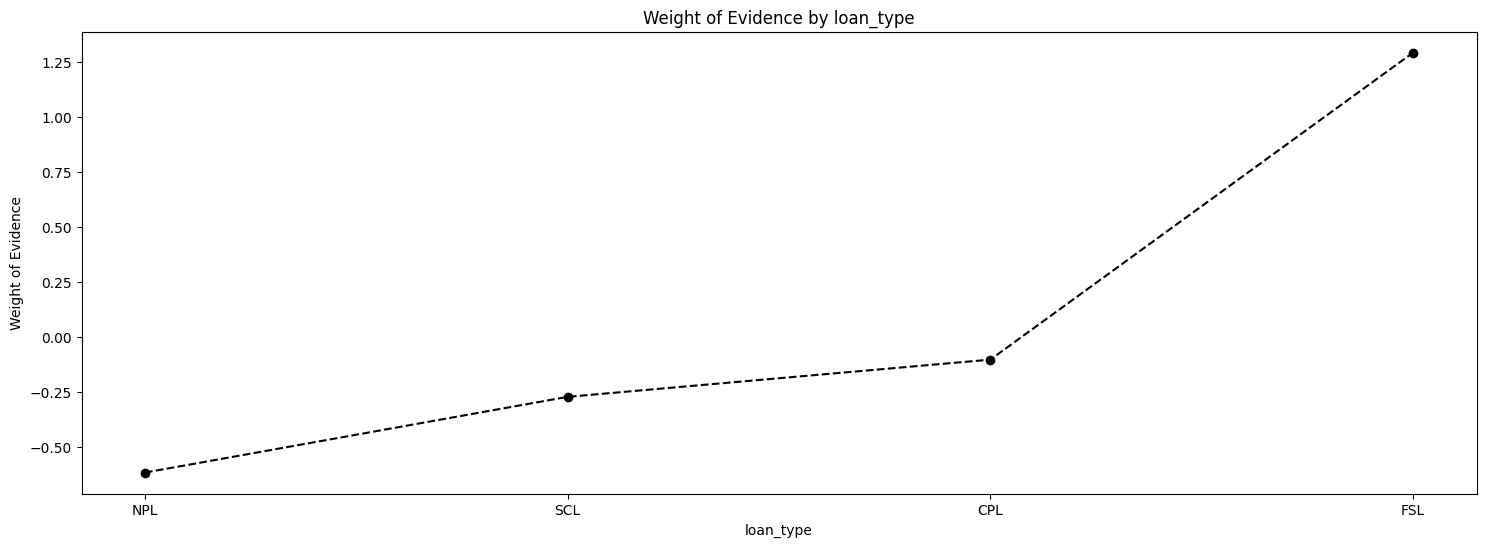

In [58]:
plot_by_woe(loan_type_woe)

In [59]:
loan_type_groups = [["BLNR", "SCPD", "SCPM", "SCPY", "NPL"],
                    ["SCL"],
                    ["CPL"],
                    ["FSL", "BLNC", "GUBF", "GURB"]]

In [60]:
def loan_type_binning(df, groups):
    for i, group in enumerate(groups):
        for loan_type in group:
            df.loc[df["loan_type"] == loan_type, "loan_type"] = f'group_{chr(97+i)}'
    remaining_loan_types = set(df["loan_type"]) - set([f'group_{chr(97+i)}' for i in range(len(groups))])
    return df

In [61]:
X_binning = loan_type_binning(X_binning, loan_type_groups)
X_binning.shape

(4704, 6)

In [62]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,group_f,group_f,group_a,20000000.00,same
289,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,80000000.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,group_a,group_a,group_a,513117.72,same
838,LATIN AMERICA AND CARIBBEAN,group_j,group_j,group_a,16000000.00,same
94,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,11200000.00,no_guarantor


In [63]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,2020,0.015842,0.429422,32.0,1988.0,0.164948,0.440798,-0.982954,NaN,NaN,0.910234
1,group_b,789,0.031686,0.167730,25.0,764.0,0.128866,0.169401,-0.273498,0.015844,0.709457,0.910234
2,group_c,1501,0.037308,0.319090,56.0,1445.0,0.288660,0.320399,-0.104319,0.005623,0.169179,0.910234
3,group_d,394,0.205584,0.083759,81.0,313.0,0.417526,0.069401,1.794440,0.168275,1.898759,0.910234


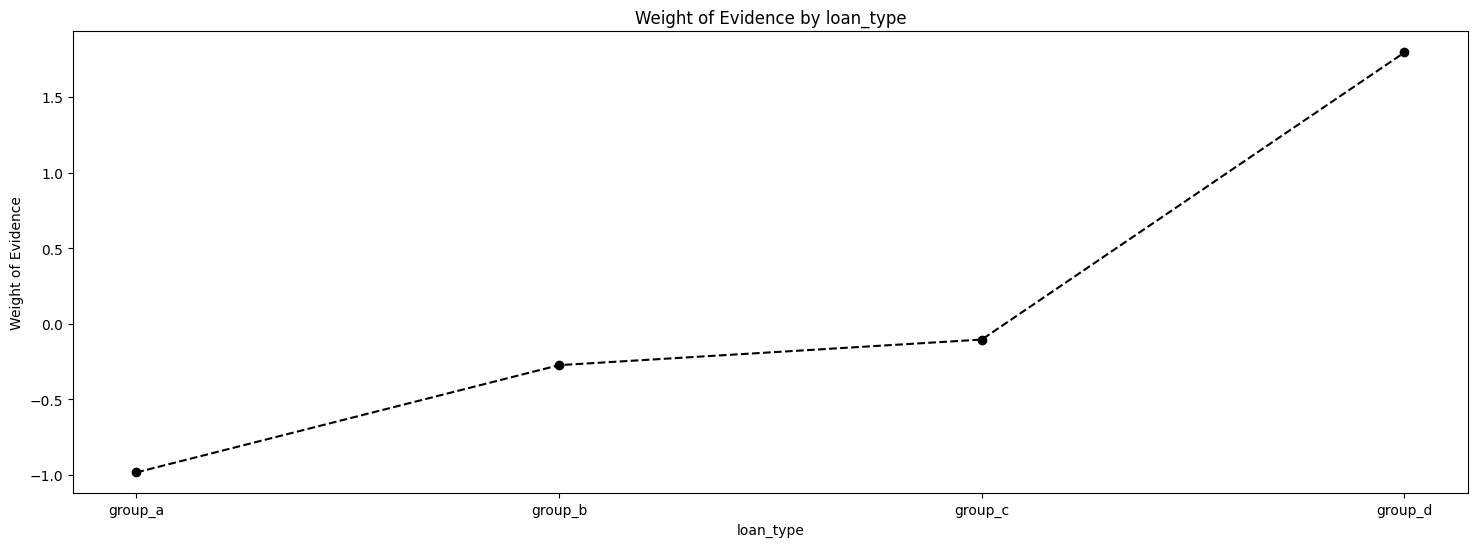

In [64]:
plot_by_woe(loan_type_woe)

#### V.A.1.E. Principal Amount

In [65]:
X_binning["principal_amount_binned"] = pd.cut(X_binning["principal_amount"], 5)
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,2.692293e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,NaN,NaN,inf
1,5.225000e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
2,5.211286e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
3,5.207500e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
4,5.202000e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
5,5.200000e+07,6,0.000000,0.001276,0.0,6.0,0.000000,0.001330,-inf,0.000000,NaN,inf
6,5.193297e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
7,5.192495e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
8,5.182126e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf
9,5.164211e+07,1,0.000000,0.000213,0.0,1.0,0.000000,0.000222,-inf,0.000000,NaN,inf


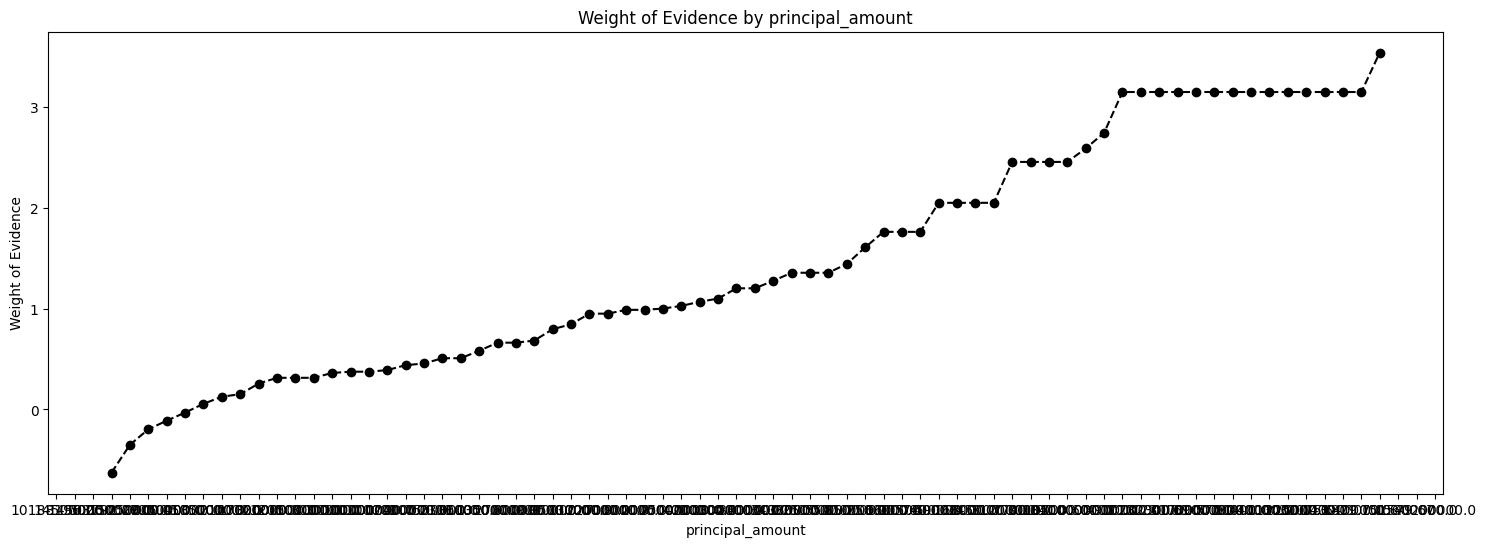

In [66]:
plot_by_woe(principal_amount_woe)

In [67]:
def principal_amount_binning(df):
    bins = [-np.inf, 1978840.31, 8013587.75, 23240000.00, 40215236.00, 54947816.00, 249441952.00, np.inf]
    bin_labels = ["-inf_to_1978840.31", "1978840.31_to_8013587.75", "8013587.75_to_23240000.00", "23240000.00_to_40215236.00", "40215236.00_to_54947816.00", "54947816.00_to_249441952.00", "249441952.00_to_inf"]
    df["principal_amount"] = pd.cut(df["principal_amount"], bins = bins, labels = bin_labels)
    df["principal_amount"] = df["principal_amount"].astype(str)
    return df

In [68]:
X_binning = principal_amount_binning(X_binning)
unused_feat_removal(X_binning, "principal_amount_binned")
X_binning.shape

(4704, 6)

In [69]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,group_f,group_f,group_a,8013587.75_to_23240000.00,same
289,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,54947816.00_to_249441952.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,group_a,group_a,group_a,-inf_to_1978840.31,same
838,LATIN AMERICA AND CARIBBEAN,group_j,group_j,group_a,8013587.75_to_23240000.00,same
94,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,8013587.75_to_23240000.00,no_guarantor


In [70]:
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,40215236.00_to_54947816.00,349,0.014327,0.074192,5.0,344.0,0.025773,0.076275,-1.085009,NaN,NaN,0.360269
1,23240000.00_to_40215236.00,797,0.031368,0.169430,25.0,772.0,0.128866,0.171175,-0.283914,0.017041,0.801095,0.360269
2,8013587.75_to_23240000.00,1149,0.033943,0.244260,39.0,1110.0,0.201031,0.246120,-0.202359,0.002575,0.081555,0.360269
3,1978840.31_to_8013587.75,695,0.034532,0.147747,24.0,671.0,0.123711,0.148780,-0.184521,0.000590,0.017838,0.360269
4,54947816.00_to_249441952.00,1239,0.035513,0.263393,44.0,1195.0,0.226804,0.264967,-0.155518,0.000980,0.029003,0.360269
5,249441952.00_to_inf,237,0.071730,0.050383,17.0,220.0,0.087629,0.048780,0.585780,0.036217,0.741298,0.360269
6,-inf_to_1978840.31,238,0.168067,0.050595,40.0,198.0,0.206186,0.043902,1.546807,0.096337,0.961027,0.360269


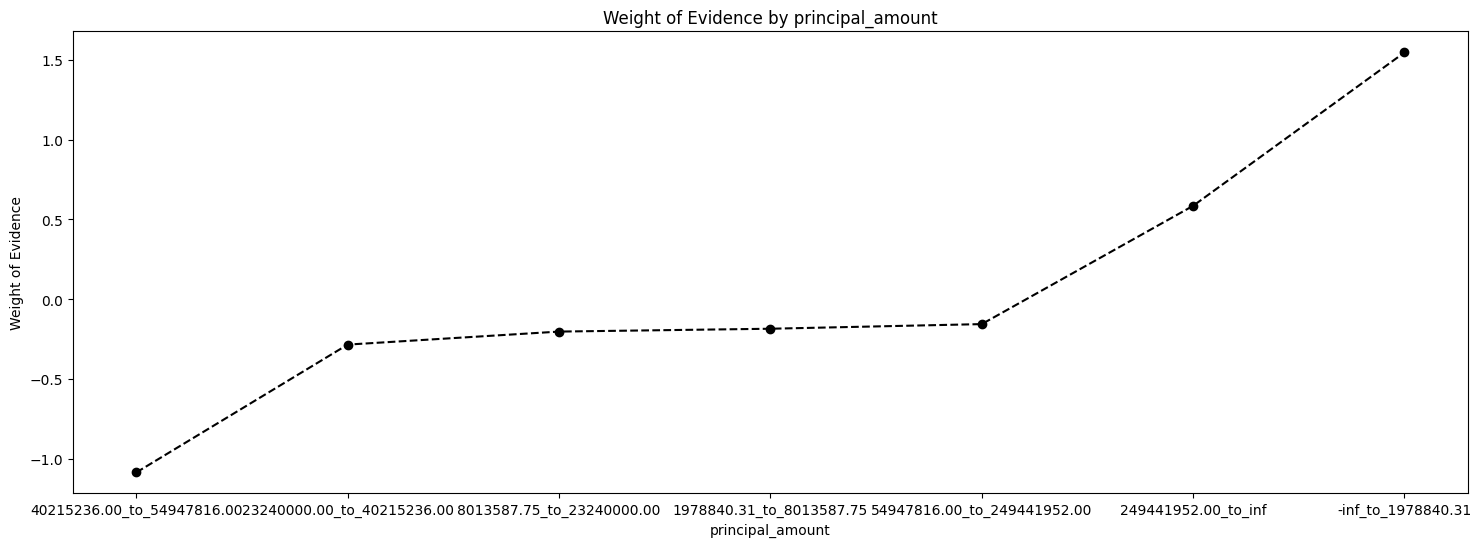

In [71]:
plot_by_woe(principal_amount_woe)

In [72]:
X_binning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4704 entries, 8919 to 6608
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   region                    4704 non-null   object
 1   country                   4704 non-null   object
 2   guarantor                 4704 non-null   object
 3   loan_type                 4704 non-null   object
 4   principal_amount          4704 non-null   object
 5   country_guarantor_status  4704 non-null   object
dtypes: object(6)
memory usage: 257.2+ KB


#### V.A.1.F. Country - Guarantor Status

In [73]:
country_guarantor_status_woe = woe_analysis(X_binning, "country_guarantor_status", y_train)
country_guarantor_status_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country_guarantor_status,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,differ,39,0.000000,0.008291,0.0,39.0,0.000000,0.008647,-inf,NaN,NaN,inf
1,same,4476,0.039768,0.951531,178.0,4298.0,0.917526,0.952993,-0.037927,0.039768,inf,inf
2,no_guarantor,189,0.084656,0.040179,16.0,173.0,0.082474,0.038359,0.765491,0.044888,0.803419,inf


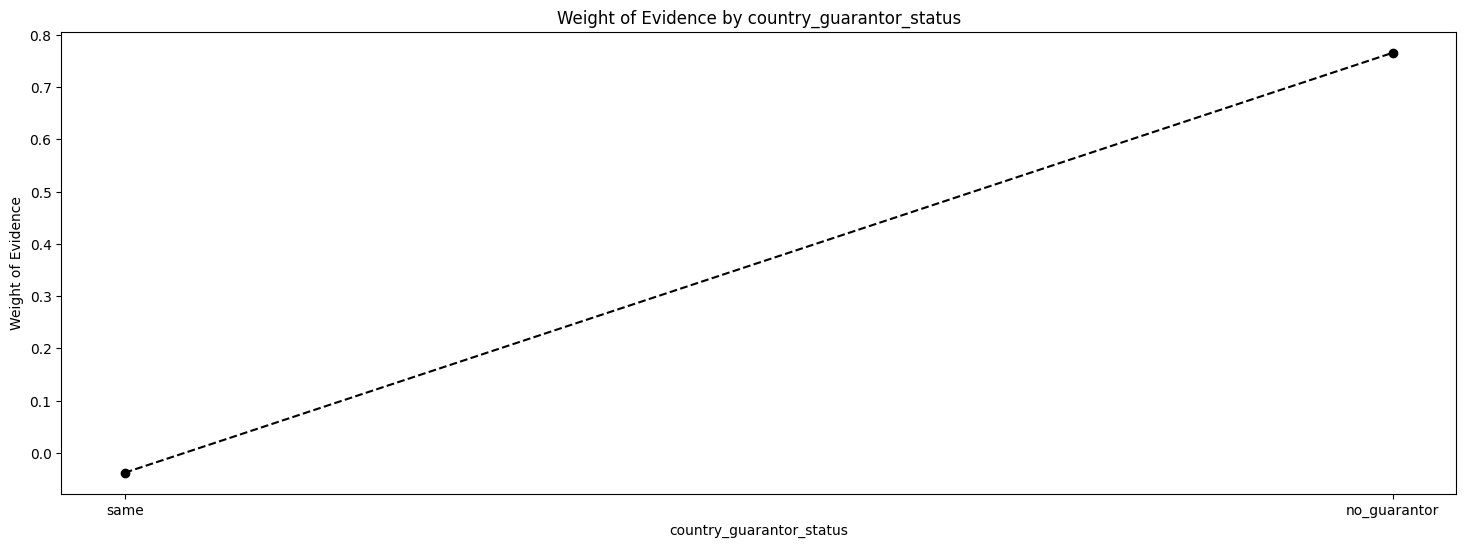

In [74]:
plot_by_woe(country_guarantor_status_woe)

## V.B. Feature Binning One-Hot Encoding

In [75]:
X_train_binned = X_train.copy()
X_test_binned = X_test.copy()

In [76]:
def feature_binning(df):
    df = region_binning(df)
    df = country_binning(df, country_groups)
    df = guarantor_binning(df, guarantor_groups)
    df = loan_type_binning(df, loan_type_groups)
    df = principal_amount_binning(df)
    return df

In [77]:
X_train_binned = feature_binning(X_train_binned)
X_test_binned = feature_binning(X_test_binned)
X_train_binned.shape, X_test_binned.shape

((4704, 6), (2017, 6))

In [78]:
X_train_binned.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
8919,MIDDLE EAST AND NORTH AFRICA,group_f,group_f,group_a,8013587.75_to_23240000.00,same
289,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,54947816.00_to_249441952.00,no_guarantor
2266,LATIN AMERICA AND CARIBBEAN,group_a,group_a,group_a,-inf_to_1978840.31,same
838,LATIN AMERICA AND CARIBBEAN,group_j,group_j,group_a,8013587.75_to_23240000.00,same
94,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_a,group_j,group_a,8013587.75_to_23240000.00,no_guarantor


In [79]:
X_test_binned.head()

,region,country,guarantor,loan_type,principal_amount,country_guarantor_status
219,EUROPE AND CENTRAL ASIA & SOUTH ASIA,group_a,group_j,group_a,23240000.00_to_40215236.00,no_guarantor
3628,MIDDLE EAST AND NORTH AFRICA,group_b,group_b,group_a,54947816.00_to_249441952.00,same
497,LATIN AMERICA AND CARIBBEAN,group_g,group_g,group_a,54947816.00_to_249441952.00,same
5583,EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PA...,group_b,group_b,group_a,1978840.31_to_8013587.75,same
1556,LATIN AMERICA AND CARIBBEAN,group_j,group_j,group_a,54947816.00_to_249441952.00,same


In [80]:
feature_to_encode = ["region", "country", "guarantor", "loan_type", "principal_amount", "country_guarantor_status"]

In [81]:
def one_hot_encoding(df, feature_to_encode):
    df_encoded = pd.get_dummies(df,
                                columns = feature_to_encode,
                                prefix = feature_to_encode,
                                prefix_sep = ":")
    df_encoded = df_encoded.astype(int)
    return df_encoded

In [82]:
X_train_ohe = one_hot_encoding(X_train_binned, feature_to_encode)
X_test_ohe = one_hot_encoding(X_test_binned, feature_to_encode)
X_train_ohe.shape, X_test_ohe.shape

((4704, 40), (2017, 40))

In [83]:
X_train_ohe.head()

,region:EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC,region:EUROPE AND CENTRAL ASIA & SOUTH ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:WESTERN AND CENTRAL AFRICA,country:group_a,country:group_b,country:group_c,country:group_d,country:group_e,country:group_f,country:group_g,country:group_h,country:group_i,country:group_j,country:group_k,guarantor:group_a,guarantor:group_b,guarantor:group_c,guarantor:group_d,guarantor:group_e,guarantor:group_f,guarantor:group_g,guarantor:group_h,guarantor:group_i,guarantor:group_j,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d,principal_amount:-inf_to_1978840.31,principal_amount:1978840.31_to_8013587.75,principal_amount:23240000.00_to_40215236.00,principal_amount:249441952.00_to_inf,principal_amount:40215236.00_to_54947816.00,principal_amount:54947816.00_to_249441952.00,principal_amount:8013587.75_to_23240000.00,country_guarantor_status:differ,country_guarantor_status:no_guarantor,country_guarantor_status:same
8919,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
289,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2266,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
838,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
94,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [84]:
X_test_ohe.head()

,region:EASTERN AND SOUTHERN AFRICA & EAST ASIA AND PACIFIC,region:EUROPE AND CENTRAL ASIA & SOUTH ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:WESTERN AND CENTRAL AFRICA,country:group_a,country:group_b,country:group_c,country:group_d,country:group_e,country:group_f,country:group_g,country:group_h,country:group_i,country:group_j,country:group_k,guarantor:group_a,guarantor:group_b,guarantor:group_c,guarantor:group_d,guarantor:group_e,guarantor:group_f,guarantor:group_g,guarantor:group_h,guarantor:group_i,guarantor:group_j,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d,principal_amount:-inf_to_1978840.31,principal_amount:1978840.31_to_8013587.75,principal_amount:23240000.00_to_40215236.00,principal_amount:249441952.00_to_inf,principal_amount:40215236.00_to_54947816.00,principal_amount:54947816.00_to_249441952.00,principal_amount:8013587.75_to_23240000.00,country_guarantor_status:differ,country_guarantor_status:no_guarantor,country_guarantor_status:same
219,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3628,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
497,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
5583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1556,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1


## V.C. Export Data

In [85]:
X_train_ohe.to_pickle('../../data/processed/X_train_ohe.pkl')
X_test_ohe.to_pickle('../../data/processed/X_test_ohe.pkl')